<h1 style="color:blue">Initial Finetuning of GPT-3 for Dreami </h1>
On dreami.day, users will be able to get dream-interpretations generated by GPT-3 through an API to Opean-AI. Models can be fine-tuned to specialize in specific tasks. We have to provide pairs of dreams and dream-interpretations. The model then learns to generate dream-interpretations from dream input. We scraped two facebook groups to get intitial data.
<h2>Data Preprocessing </h2>Scraping Facebook groups provides us with datasets where we have to filter out dream-texts in the posts and dream-interpretations in the comments. Let's import the first dataset into pandas.


In [2]:
import pandas as pd
import numpy as np

In [3]:
dreams_raw = pd.read_csv('Data/FB_scraped_Dream Symbols and Interpretation.csv')
dreams_raw.shape

(1605, 22)

In [4]:
dreams_raw.head()

,page_id,post_id,post_url,user_id,user_name,post_text,post_time,likes,comments,shares,...,commenter_id,commenter_name,comment_text,comment_time,reply_id,reply_url,replier_id,replier_name,reply_text,reply_time
0,546590529195943,1221949978326658,https://m.facebook.com/groups/546590529195943/...,780839497,Timothy Kippo,Hello and welcome to the group!\n\nI hope you ...,2021-08-14 06:44:34,76.0,25,0,...,1.000005e+14,Tonya Perkins,Thanks for accepting my request. I have many d...,2021-11-08 14:40:17,NaN,NaN,NaN,NaN,NaN,NaN
1,546590529195943,1221949978326658,https://m.facebook.com/groups/546590529195943/...,780839497,Timothy Kippo,Hello and welcome to the group!\n\nI hope you ...,2021-08-14 06:44:34,76.0,25,0,...,7.828891e+08,Emilia Toivonen,thanks for letting me join!,2021-10-08 14:40:18,NaN,NaN,NaN,NaN,NaN,NaN
2,546590529195943,1221949978326658,https://m.facebook.com/groups/546590529195943/...,780839497,Timothy Kippo,Hello and welcome to the group!\n\nI hope you ...,2021-08-14 06:44:34,76.0,25,0,...,1.139412e+09,Debbie Ward,Thank you for allowing me to join.,2021-10-08 14:40:18,NaN,NaN,NaN,NaN,NaN,NaN
3,546590529195943,1221949978326658,https://m.facebook.com/groups/546590529195943/...,780839497,Timothy Kippo,Hello and welcome to the group!\n\nI hope you ...,2021-08-14 06:44:34,76.0,25,0,...,1.000010e+14,Elisah Meis,I personally would prefer is members would mak...,2021-09-08 14:40:19,1.235685e+15,https://facebook.com/1235685116953144,1.000010e+14,Terry Dey,Elisah Meis I agree but we've noticed many of ...,2021-09-08 14:40:34
4,546590529195943,1221949978326658,https://m.facebook.com/groups/546590529195943/...,780839497,Timothy Kippo,Hello and welcome to the group!\n\nI hope you ...,2021-08-14 06:44:34,76.0,25,0,...,1.000010e+14,Elisah Meis,I personally would prefer is members would mak...,2021-09-08 14:40:19,1.235686e+15,https://facebook.com/1235686206953035,1.000010e+14,Elisah Meis,Thats true... however a bit more info would be...,2021-09-08 14:40:34


In [5]:
dreams_raw.columns

Index(['page_id', 'post_id', 'post_url', 'user_id', 'user_name', 'post_text',
       'post_time', 'likes', 'comments', 'shares', 'comment_id', 'comment_url',
       'commenter_id', 'commenter_name', 'comment_text', 'comment_time',
       'reply_id', 'reply_url', 'replier_id', 'replier_name', 'reply_text',
       'reply_time'],
      dtype='object')

The column post_text contains dreams. The column comment_text contains dream-interpretations. However, not all cases are actual dreams or dream-interpretations. Some comments may be admin-posts about group-guidelines. Some comments are additional addons by the poster, or just comments without interpretations. Some dream-posts are also very short, and some posts and comments are duplicates. We can use post_id, or comment_id to check for duplicates. <br>
Let's remove all rows without comments.

In [6]:
dreams_raw.dropna(subset=['comment_id', 'comment_text','post_text', 'post_id'], inplace=True)

In [7]:
dreams_raw.shape

(1570, 22)

And remove duplicate comments. Duplicate comments indicate that comments were again comented on.

In [8]:
dreams = dreams_raw.drop_duplicates(subset='comment_id')

The first post is a welcome post describing the purpose of the group. It is pinned and has many comments. Those aren't dreams. So let's delete those rows too. We can use the post id.

In [9]:
dreams = dreams[dreams.post_id != dreams.loc[0,'post_id']]
print("shape dreams",dreams.shape)
dreams.head()

shape dreams (763, 22)


,page_id,post_id,post_url,user_id,user_name,post_text,post_time,likes,comments,shares,...,commenter_id,commenter_name,comment_text,comment_time,reply_id,reply_url,replier_id,replier_name,reply_text,reply_time
26,546590529195943,1418344718687182,https://m.facebook.com/groups/546590529195943/...,410066253948006,Dream Symbols and Interpretation,Hello I had this dream about my husband ex. In...,2022-05-08 14:26:53,0.0,1,0,...,4.100663e+14,Group member,The man that she was standing in the photo wit...,2022-05-08 14:37:36,NaN,NaN,NaN,NaN,NaN,NaN
29,546590529195943,1414798689041785,https://m.facebook.com/groups/546590529195943/...,1190885453,Marie Glaze Shahan,"Mother's day is coming up, it will be the firs...",2022-05-05 03:46:47,1.0,2,0,...,5.603456e+08,Alexandra Moulding,What a beautiful dream,2022-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
30,546590529195943,1414798689041785,https://m.facebook.com/groups/546590529195943/...,1190885453,Marie Glaze Shahan,"Mother's day is coming up, it will be the firs...",2022-05-05 03:46:47,1.0,2,0,...,1.000640e+14,Georgia Maisie Jayne,Oh that’s wonderful! I’ve had a very similar d...,2022-05-08 12:40:41,NaN,NaN,NaN,NaN,NaN,NaN
31,546590529195943,1417898688731785,https://m.facebook.com/groups/546590529195943/...,100004875131908,Ashcharya Wickramage,Need some interpretation:\n\nI was walking on ...,2022-05-08 05:03:50,0.0,1,0,...,5.603456e+08,Alexandra Moulding,This is such a beautiful dream. I feel it refl...,2022-05-08 10:40:43,NaN,NaN,NaN,NaN,NaN,NaN
32,546590529195943,1417604302094557,https://m.facebook.com/groups/546590529195943/...,717670376,Rachel Parry,Good morning.\n\nI keep having a dream where i...,2022-05-07 21:39:19,0.0,1,0,...,5.603456e+08,Alexandra Moulding,"Hi, my suggestion is that the dream is about a...",2022-05-07 22:40:45,1.417618e+15,https://facebook.com/1417618045426516,717670376.0,Rachel Parry,Alexandra Moulding what kind of thing/part of ...,2022-05-07 22:40:45


Sometimes the original poster commented on his own dream. Let's remove all rows where user_id and commenter_id are identical

In [10]:
dreams = dreams[dreams['user_id']!= dreams['commenter_id']]
dreams.shape

(732, 22)

The next simplifications of the dataset are going to be a bit more arbitrary. We want to remove too short dream-texts and interpretations. Let's check the distribution of lengths in the posts. For that we tokenize the strings and compute the number of tokens per string. The library to implement many nlp-methods is nltk.

In [11]:
import nltk

In [12]:
posts = pd.DataFrame(dreams['post_text'].drop_duplicates())
posts['length']=posts['post_text'].apply(lambda x: len(nltk.word_tokenize(x)))

<AxesSubplot:>

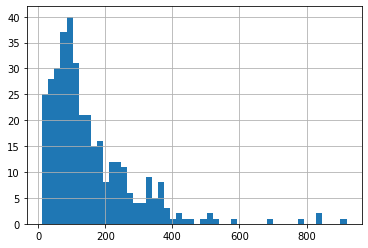

In [13]:
#import matplotlib.pyplot as plt
posts['length'].hist(bins=50)

In [14]:
posts['length'].describe()

count    361.000000
mean     155.734072
std      132.635010
min       12.000000
25%       70.000000
50%      114.000000
75%      207.000000
max      919.000000
Name: length, dtype: float64

The length of dream texts varies between 12 tokens and 919 tokens. The mean of 156 is above the median of 114. Let's check out how comments are distributed.

In [15]:
comments = pd.DataFrame(dreams['comment_text'].drop_duplicates())
comments['length']=0
for i in range(len(comments)):
    comments.iloc[i,1]= len(nltk.word_tokenize(comments.iloc[i,0]))

In [16]:
comments['length']=comments['comment_text'].apply(lambda x: len(nltk.word_tokenize(x)))

<AxesSubplot:>

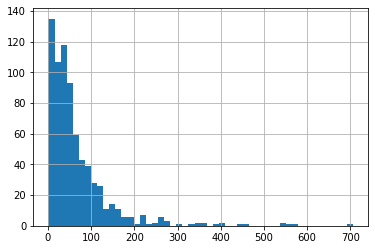

In [17]:
#import matplotlib.pyplot as plt
comments['length'].hist(bins=50)

In [18]:
comments['length'].describe()

count    732.000000
mean      66.631148
std       77.725308
min        1.000000
25%       22.000000
50%       44.000000
75%       83.250000
max      706.000000
Name: length, dtype: float64

The length of comment strings varies between 1 tokens and 706 tokens. The mean of 66 is above the median of 44.

We decide to sort the posts and comments by length, to get a subjective impression of what length constitutes a good dream-text and interpretation. We are going to use that as a cutoff. What is noticeable is that the shorter dream posts are questions about particular dream-symbols like: "This is the second night I dreamt about elevators. What do elevators mean?". These questions about symbols are not so useful and don't match our Jungian psychological theory about dreams. We are interested in narrative dream-texts. The meaning of elements is found in the relationship to the whole dream-narrative. We are going to filter out, so that we only have narrative dream-texts.

We are manually going to check the content of a few posts and find the minimal length of dreams being written in a narrative form. Then we are going to delte all shorter posts. Below is an example of an acceptable narrative dream-post. The text has quite a few errors in it though. It is quite short, with a token-length of 73. Let's look for instances of shorter posts that don't comply with the criterion of being narrative form.

In [19]:
posts.loc[259,'post_text']

'I dreamed that I was joy riding on a bus downtown and lost control and hit one of the buildings down River St. Afterwards, me and other people on the bus were having a meeting was blaming the bus driver for taking too long to long and some were blaming me because others have other things to do and they were gonna be late. I woke up quick.'

Here is an example of a non-narrative dream-post. The poster is only asking about the meaning of a particular motive, without a narrative.

In [20]:
posts.loc[793,'post_text']

'Hello all, I have recently dreamed of some fractal lights/rainbow reflected on water. It was very vivid and beautiful. Can someone please help interpreting? Tia x'

The shortest post we are going to include is token length of 45. This is the particular dream which seems to meet our minimal narrative criteria.

In [21]:
posts.loc[869,'post_text']

'Hi guys I dreamed I was fishing …line got stuck and went down there was a shark and another attacking each other on the line and they kept coming I kept being pulled until I let go and went up what does it mean?'

Let's make the same decision for dream interpretations. These can be quite short. The criterion from the jungian theory of a valid dream interpretations is helpfulness and insightfulness. In principle a single sentence can fulfill these criteria. Of course, we would love our model to create much more sophisticated interpretations. But most comments are a one-sentence interpretation. This interpretation below has 13 tokens.

In [22]:
comments.loc[1217,'comment_text']

'you are resisting a change that it vital for your future growth.'

Let's create our dataset containing of posts with at least 45 tokens and comments with at least 13 tokens.

In [23]:
dreams['length_post']=dreams['post_text'].apply(lambda x: len(nltk.word_tokenize(x)))
dreams['length_comment']=dreams['comment_text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
np.corrcoef(dreams.length_post,dreams.length_comment)

array([[1.        , 0.24270779],
       [0.24270779, 1.        ]])

There is a small correlation of the length of a dream-text and its interpretations.

In [25]:
dreams = dreams[(dreams['length_post']>= 45) & (dreams['length_comment']>=13)]
dreams.shape

(515, 24)

we have 515 comments left. Let's see how many posts are included

In [26]:
dreams['post_id'].nunique()

312

there are 312 posts (or potential dreams). These are the numbers for minimal quality standards. Now we are going to maximize the quality standards. We are subjectively going to look at dream-texts and only decide to include lengths of those we unambivalentely consider high quality.

In [27]:
dreams.loc[1141,'post_text']

'I had a dream that me and my fiancé were back in high school (neither of us knew each other in high school, went to the same school, or even lived in the same state). In my dream, we were in class and I had a major crush on him so I would look at him any chance I got. When I woke up I felt extremely in love with him, anyone know why this happens?'

This dream is the lowest quality standard for inclusion. It consists of 85 tokens. Let's check the interpretations (comments).

In [28]:
dreams.loc[966,'comment_text']

'To me in this dream you are being challenged in life. That you are with your sil represents traits she has are about yourself. This is about you struggling to move forward in life.'

This comment has a length of 37 tokens. Let's see how many tuples we are left with when choosing posts with minimum length of 85 tokens and comments with length of 37 tokens.

In [29]:
dreams_high_qual = dreams[(dreams['length_post']>= 85) & (dreams['length_comment']>=37)]
dreams_high_qual.shape

(273, 24)

Now for both high and low quality we are going to manually go through each post and comment and see if they are actually dreams and dream-interpretations. Let's save the tables with the relevant columns.

In [30]:
columns_relevant = ['user_id', 'post_text', 'post_time', 'likes', 'comments', 'comment_id', 'commenter_id', 'comment_text', 'comment_time', 'length_post', 'length_comment']

In [31]:
dreams[columns_relevant].to_csv('Data/dream_symbols_and_interpretation_lowQ.csv')
dreams_high_qual[columns_relevant].to_csv('Data/dream_symbols_and_interpretation_highQ.csv')

To repeat all the steps above on other datasets with the same structure, a python file with a function is provided in the repository called dream_preprocessing.py

Let's import the manually cleaned lowQ-Dataset.

In [32]:
dreams_clean_lowQ = pd.read_csv("Data/dream_symbols_and_interpretation_lowQ_clean.csv", index_col=0)
dreams_clean_lowQ

,user_id,post_text,post_time,likes,comments,comment_id,commenter_id,comment_text,comment_time,length_post,length_comment
31,100004875131908,Need some interpretation:\n\nI was walking on ...,2022-05-08 05:03:50,0.0,1,1418163442038643,560345596,This is such a beautiful dream. I feel it refl...,2022-05-08 10:40:43,129,86
32,717670376,Good morning.\n\nI keep having a dream where i...,2022-05-07 21:39:19,0.0,1,1417617095426611,560345596,"Hi, my suggestion is that the dream is about a...",2022-05-07 22:40:45,77,50
40,777843956533657,So I woke up from a very strange dream. I ofte...,2022-05-07 11:08:45,NaN,4,1417825745405746,100002316665692,I can strongly affirm at the least that you ca...,2022-05-08 10:40:47,319,340
41,662693744736501,So I had a dream the other night which really ...,2022-05-07 10:03:10,NaN,6,1417214508800203,698883807,I believe they were trying to tell you they're...,2022-05-07 00:00:00,110,28
48,100001409910387,I had a dream I was really drunk and I was wal...,2022-05-08 05:14:00,0.0,1,1417989555389365,698883807,"To me this implies a sudden subconscious ""jump...",2022-05-08 06:40:58,113,248
...,...,...,...,...,...,...,...,...,...,...,...
1595,100000351851011,Thank you for accepting my request this is goi...,2022-04-17 02:43:01,NaN,5,1401092900412364,100000039783347,He came to you in your dream. He was smiling a...,2022-04-17 15:09:17,355,20
1597,1403261066,Does anyone know why we dream of a certain son...,2022-04-19 13:29:25,0.0,1,1401166313738356,100009042510759,The title I feel holds your answer. It's tied ...,2022-04-17 15:09:18,73,16
1601,1084347601,"Hello, so this is so weird bc I had said to a ...",2022-04-19 13:35:45,0.0,1,1401165577071763,100009042510759,The money represents some gain or wealth that ...,2022-04-17 15:09:24,95,54
1602,100042001720163,Had a dream... was like the country was going ...,2022-04-19 03:19:44,1.0,2,1401019193753068,780839497,"Maybe something related to ""coming of age"" or ...",2022-04-17 15:09:27,117,40


To remove the deleted rows also from the high-quality dataset, we take the rows which exist in both datasets. We use the set-funtion on indeces.

In [33]:
dreams_clean_highQ =dreams_high_qual.loc[set(dreams_clean_lowQ.index) & set(dreams_high_qual.index)][list(dreams_clean_lowQ.columns)]
dreams_clean_highQ.to_csv("Data/dream_symbols_and_interpretation_highQ.csv")

/tmp/ipykernel_8780/4148793892.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dreams_clean_highQ =dreams_high_qual.loc[set(dreams_clean_lowQ.index) & set(dreams_high_qual.index)][list(dreams_clean_lowQ.columns)]


In [34]:
print("size low quality",dreams_clean_lowQ.shape)
print("size high quality",dreams_clean_highQ.shape)

size low quality (332, 11)
size high quality (223, 11)


Some more cleaning of the data was necessary. We created two new columns indicating provided background information by dreamers and reported wakeup states. Those were sometimes included in the dream-reports. Let's load the cleaned dataset.

In [35]:
dreams_symbols_clean = pd.read_csv("Data/dream_symbols_and_interpretation_highQ_clean.csv", index_col=0)
dreams_symbols_clean.shape

(188, 13)

The high quality data-frame is sufficiently large for our purposes. We have one more dataset from a different facebook group. Let's apply the dream_preprocess function we created before manually selecting the dreams and comments that show sufficient quality.

In [36]:
from dream_preprocessing import dream_preprocess
dreams_2= dream_preprocess('Data/FB_scraped_Jordan_Peterson.csv',85,37)
print(dreams_2.shape)

(354, 11)


In [37]:
dreams_2.to_csv('Data/dreams_Jordan_Peterson.csv')

In [38]:
dreams_JP_clean = pd.read_csv("Data/dreams_Jordan_Peterson_clean.csv", index_col=0)
dreams_JP_clean.shape

(129, 13)

In [39]:
data1= dreams_symbols_clean
data2= dreams_JP_clean

In [40]:
#Dropping irrelevant columns in data1

data1= data1.drop([ 'user_id', 'post_time', 'likes', 'comments', 'comment_id', 'commenter_id', 'comment_time', 'length_post', 'length_comment'], axis=1 )

data1

,post_text,comment_text,background_info,wakeup_state
1536,"Dreamt my daughter, who is a mentally disabled...",What an empowering dream! I love it! Your daug...,NaN,NaN
1537,"Dreamt my daughter, who is a mentally disabled...",I think it can mean there is anxiety in you ab...,NaN,NaN
1540,"Dreamt my daughter, who is a mentally disabled...",The dream may be about your or her self contro...,NaN,NaN
1541,"Dreamt my daughter, who is a mentally disabled...","This is beautiful, reminds me of the strength ...",NaN,It felt scary but also good in a sense when I ...
1030,I was downstairs watching tv with my daughter ...,"If you were having a hot flush in your sleep, ...",NaN,I very abruptly wake up from this dream and my...
...,...,...,...,...
504,My brother in law had a girl added as his sist...,I get the feeling this is s woman posting. My ...,NaN,NaN
506,"I was at my work, and had walked to my car. I ...",It could be to do with your behavior in regard...,NaN,NaN
1530,"Last night I dreamt that he was back, I was a ...",To me I feel like your dreams are telling you ...,I have had so many sad dreams for about a yea...,and then I woke up crying. It feels like the ...
1531,There was a male individual that was ousted fr...,This is about you evolving and taking a stand ...,NaN,I woke up feeling very sad and guilty.


In [41]:
#Dropping irrelevant columns in data2

data2= data2.drop(['user_id', 'post_time', 'likes', 'comments', 'comment_id', 'commenter_id', 'comment_time', 'length_post', 'length_comment'], axis=1 )

data2

,post_text,comment_text,background_info,wakeup_state
171,I was walking through medieval cellars that we...,"The dark, ominous ""shadow"" chasing you was you...",NaN,I woke up cold and anxious
172,I was walking through medieval cellars that we...,This is one of those dreams that sound amazing...,NaN,I woke up cold and anxious
179,I was somehow involved in a murder. An acquain...,"Jung spoke about how the 'strong man', or thug...",NaN,This was one of those ones you wake up shaking...
219,I am walking around a dilapidated city. It is ...,There's a lot of layers in this dream. I'll ju...,NaN,NaN
249,"In my dream, I am in the attic of a palatial b...",Are other coffins empty? Must be if you said o...,NaN,NaN
...,...,...,...,...
3515,In the dream I was swimming in a pool at a bea...,The message I would take pivots on the makeup....,Obsessing over the girl in my dream. She is a ...,NaN
3518,In the dream I was swimming in a pool at a bea...,If we look at a dream as your subconscious try...,Obsessing over the girl in my dream. She is a ...,NaN
3526,In the dream I was swimming in a pool at a bea...,Yes it sounds to me like all appearance - the ...,Obsessing over the girl in my dream. She is a ...,NaN
3557,"I am together with a middle aged woman, an old...",Oh cool - waking up to self deception from you...,I wake up thinking that while the culture and ...,NaN


In [42]:
#Merging the 2 datasets as one

data3 = data1.merge(data2, on= ['post_text', 'comment_text', 'background_info', 'wakeup_state'], how = 'outer')

data3

,post_text,comment_text,background_info,wakeup_state
0,"Dreamt my daughter, who is a mentally disabled...",What an empowering dream! I love it! Your daug...,NaN,NaN
1,"Dreamt my daughter, who is a mentally disabled...",I think it can mean there is anxiety in you ab...,NaN,NaN
2,"Dreamt my daughter, who is a mentally disabled...",The dream may be about your or her self contro...,NaN,NaN
3,"Dreamt my daughter, who is a mentally disabled...","This is beautiful, reminds me of the strength ...",NaN,It felt scary but also good in a sense when I ...
4,I was downstairs watching tv with my daughter ...,"If you were having a hot flush in your sleep, ...",NaN,I very abruptly wake up from this dream and my...
...,...,...,...,...
312,In the dream I was swimming in a pool at a bea...,The message I would take pivots on the makeup....,Obsessing over the girl in my dream. She is a ...,NaN
313,In the dream I was swimming in a pool at a bea...,If we look at a dream as your subconscious try...,Obsessing over the girl in my dream. She is a ...,NaN
314,In the dream I was swimming in a pool at a bea...,Yes it sounds to me like all appearance - the ...,Obsessing over the girl in my dream. She is a ...,NaN
315,"I am together with a middle aged woman, an old...",Oh cool - waking up to self deception from you...,I wake up thinking that while the culture and ...,NaN


In [43]:
#Filling the missing values as ' __ '
data3.fillna('__', inplace=True)
data3

,post_text,comment_text,background_info,wakeup_state
0,"Dreamt my daughter, who is a mentally disabled...",What an empowering dream! I love it! Your daug...,__,__
1,"Dreamt my daughter, who is a mentally disabled...",I think it can mean there is anxiety in you ab...,__,__
2,"Dreamt my daughter, who is a mentally disabled...",The dream may be about your or her self contro...,__,__
3,"Dreamt my daughter, who is a mentally disabled...","This is beautiful, reminds me of the strength ...",__,It felt scary but also good in a sense when I ...
4,I was downstairs watching tv with my daughter ...,"If you were having a hot flush in your sleep, ...",__,I very abruptly wake up from this dream and my...
...,...,...,...,...
312,In the dream I was swimming in a pool at a bea...,The message I would take pivots on the makeup....,Obsessing over the girl in my dream. She is a ...,__
313,In the dream I was swimming in a pool at a bea...,If we look at a dream as your subconscious try...,Obsessing over the girl in my dream. She is a ...,__
314,In the dream I was swimming in a pool at a bea...,Yes it sounds to me like all appearance - the ...,Obsessing over the girl in my dream. She is a ...,__
315,"I am together with a middle aged woman, an old...",Oh cool - waking up to self deception from you...,I wake up thinking that while the culture and ...,__


In [44]:
#Randomizing the rows of the dataset

data3= data3.sample(frac=1).reset_index(drop=True)
data3

,post_text,comment_text,background_info,wakeup_state
0,So the dream before waking this morning was th...,"The house represents you, you might be like an...",I frequently dream of houses.,__
1,The setting was present-day at our house at th...,"At that age, I would think you had an underlyi...",I had a recurring nightmare. I think I was aro...,Sometimes I would wake up crying.
2,"I am in an underground activity, like an escap...",This dream represents your life. You and other...,__,__
3,"Dreamt my daughter, who is a mentally disabled...","This is beautiful, reminds me of the strength ...",__,It felt scary but also good in a sense when I ...
4,"At a wedding prep, i found a live puppy burnin...",You are concerned about marriage? The mother i...,__,__
...,...,...,...,...
312,My sister and my dog were in grave danger? I f...,I wonder could the sister represent a part of ...,__,__
313,"I was out at some type of restaurant, maybe. I...",This dream could be about feeling like you hav...,__,__
314,"So I had a weird ass dream last night, That I ...",I feel the dream is asking you to recognize yo...,__,__
315,Came to discover that I was being asked to par...,The marriage might relate to the royal marriag...,__,__


In [45]:
#Adding relevant separators

data3["sep2"]= [' ; '] * len(data3)
data3['sepback'] = [' Background_Info: '] * len(data3)
data3['sepdream'] = ['Dream_Text: '] * len(data3)
data3['sepwake'] = [' Wakeup_State: '] * len(data3)

data3

,post_text,comment_text,background_info,wakeup_state,sep2,sepback,sepdream,sepwake
0,So the dream before waking this morning was th...,"The house represents you, you might be like an...",I frequently dream of houses.,__,;,Background_Info:,Dream_Text:,Wakeup_State:
1,The setting was present-day at our house at th...,"At that age, I would think you had an underlyi...",I had a recurring nightmare. I think I was aro...,Sometimes I would wake up crying.,;,Background_Info:,Dream_Text:,Wakeup_State:
2,"I am in an underground activity, like an escap...",This dream represents your life. You and other...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:
3,"Dreamt my daughter, who is a mentally disabled...","This is beautiful, reminds me of the strength ...",__,It felt scary but also good in a sense when I ...,;,Background_Info:,Dream_Text:,Wakeup_State:
4,"At a wedding prep, i found a live puppy burnin...",You are concerned about marriage? The mother i...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:
...,...,...,...,...,...,...,...,...
312,My sister and my dog were in grave danger? I f...,I wonder could the sister represent a part of ...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:
313,"I was out at some type of restaurant, maybe. I...",This dream could be about feeling like you hav...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:
314,"So I had a weird ass dream last night, That I ...",I feel the dream is asking you to recognize yo...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:
315,Came to discover that I was being asked to par...,The marriage might relate to the royal marriag...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:


In [46]:
#Adding the input column

data3['input'] = data3['sepdream'] + data3["post_text"]+ data3['sep2'] + data3['sepback'] + data3["background_info"] +data3['sep2']+ data3['sepwake'] + data3['wakeup_state']

data3

,post_text,comment_text,background_info,wakeup_state,sep2,sepback,sepdream,sepwake,input
0,So the dream before waking this morning was th...,"The house represents you, you might be like an...",I frequently dream of houses.,__,;,Background_Info:,Dream_Text:,Wakeup_State:,Dream_Text: So the dream before waking this mo...
1,The setting was present-day at our house at th...,"At that age, I would think you had an underlyi...",I had a recurring nightmare. I think I was aro...,Sometimes I would wake up crying.,;,Background_Info:,Dream_Text:,Wakeup_State:,Dream_Text: The setting was present-day at our...
2,"I am in an underground activity, like an escap...",This dream represents your life. You and other...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:,"Dream_Text: I am in an underground activity, l..."
3,"Dreamt my daughter, who is a mentally disabled...","This is beautiful, reminds me of the strength ...",__,It felt scary but also good in a sense when I ...,;,Background_Info:,Dream_Text:,Wakeup_State:,"Dream_Text: Dreamt my daughter, who is a menta..."
4,"At a wedding prep, i found a live puppy burnin...",You are concerned about marriage? The mother i...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:,"Dream_Text: At a wedding prep, i found a live ..."
...,...,...,...,...,...,...,...,...,...
312,My sister and my dog were in grave danger? I f...,I wonder could the sister represent a part of ...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:,Dream_Text: My sister and my dog were in grave...
313,"I was out at some type of restaurant, maybe. I...",This dream could be about feeling like you hav...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:,Dream_Text: I was out at some type of restaura...
314,"So I had a weird ass dream last night, That I ...",I feel the dream is asking you to recognize yo...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:,Dream_Text: So I had a weird ass dream last ni...
315,Came to discover that I was being asked to par...,The marriage might relate to the royal marriag...,__,__,;,Background_Info:,Dream_Text:,Wakeup_State:,Dream_Text: Came to discover that I was being ...


In [47]:
#Dropping irrelevant columns

data3= data3.drop(['post_text', 'background_info', 'wakeup_state', 'sep2', 'sepback', 'sepdream', 'sepwake'], axis=1 )
data3 = data3.rename(columns={'comment_text': 'interpretation'})
data3

,interpretation,input
0,"The house represents you, you might be like an...",Dream_Text: So the dream before waking this mo...
1,"At that age, I would think you had an underlyi...",Dream_Text: The setting was present-day at our...
2,This dream represents your life. You and other...,"Dream_Text: I am in an underground activity, l..."
3,"This is beautiful, reminds me of the strength ...","Dream_Text: Dreamt my daughter, who is a menta..."
4,You are concerned about marriage? The mother i...,"Dream_Text: At a wedding prep, i found a live ..."
...,...,...
312,I wonder could the sister represent a part of ...,Dream_Text: My sister and my dog were in grave...
313,This dream could be about feeling like you hav...,Dream_Text: I was out at some type of restaura...
314,I feel the dream is asking you to recognize yo...,Dream_Text: So I had a weird ass dream last ni...
315,The marriage might relate to the royal marriag...,Dream_Text: Came to discover that I was being ...


In [48]:
data3['input'][2]  # A single input

"Dream_Text: I am in an underground activity, like an escape room but on a larger scale, like a labyrinth. There are lots of people walking around trying to find the way out, but getting nowhere. One of them is an old dancing partner when I was taking ballroom dancing lessons. I get the impression of a long time searching for the proper path. The focus of the dream is when I come to an old temple, Ancient Greek-ish with a large granite statue, specifically granite with a rustic pinkish hue. Looking up into the temple roof I realise no one is up there and it dawns on me that the path is likely up there as no one down here has found the way, so I head up there. The dream then goes to an out of body view of the path. There is an above ground bridge like structure, and the way corkscrews as a tunnel around it. Because its a tunnel everyone assumes its underground, but it isn't, its not logical. That's the trick. ;  Background_Info: __ ;  Wakeup_State: __"

In [49]:
#Converting the dataframe to jsonl and adding stop sequences

import json

def dump_jsonl(df, output_path, append= False):
    """
    Write list of objects to a JSON lines file.
    """
    mode = 'a+' if append else 'w'
    with open(output_path, mode, encoding='utf-8') as f:
        for i in range(len(df)):
            line={'prompt':df.iloc[i,1]+' ###', 'completion': ' ' + df.iloc[i,0]+' [END]'}
            json_record = json.dumps(line, ensure_ascii=False,separators=(',',':'))
            f.write(json_record + '\n')
    print('Wrote {} records to {}'.format(len(df), output_path))

dump_jsonl(data3, 'Data/newdata3.jsonl')

Wrote 317 records to Data/newdata3.jsonl
